In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from pathlib import Path
import json
from tqdm import tqdm
import glob

In [2]:
# Get absolute paths and download dataset
notebook_dir = Path(os.getcwd()).resolve()
dataset_root = notebook_dir.parent.parent / "data" / "CelebA-Spoof_dataset"
dataset_path = dataset_root / "CelebA_Spoof"


# Download dataset from Kaggle if not exists
def download_dataset():
    if not os.path.exists(dataset_root):
        print("Dataset not found. Downloading from Kaggle...")
        try:
            # Initialize Kaggle API
            api = KaggleApi()
            api.authenticate()

            # Download dataset with tqdm progress bar
            with tqdm(total=100, desc="Downloading dataset") as pbar:
                api.dataset_download_files(
                    "n24q02m/celeba-spoof-face-anti-spoofing-dataset",
                    path=dataset_root,
                    unzip=True,
                    quiet=False,
                    progress_callback=lambda x: pbar.update(x),
                )
            print("Dataset downloaded successfully!")
        except Exception as e:
            print(f"Error downloading dataset: {str(e)}")
            print("\nPlease ensure you have:")
            print("1. Installed kaggle package: pip install kaggle")
            print("2. Created a Kaggle account")
            print("3. Generated an API token from https://www.kaggle.com/settings")
            print("4. Placed kaggle.json in ~/.kaggle/ directory")
            return False
    else:
        print("Dataset already exists locally")
    return True


# Execute download
if not download_dataset():
    raise Exception("Failed to download dataset. Please follow the instructions above.")

Dataset already exists locally


In [3]:
# Explore and visualize the dataset directory structure including train/test splits, ID folders, and live/spoof subfolders using pathlib and os modules


# Function to explore directory structure with tqdm progress bar
def explore_directory_structure(root_dir):
    structure = {}
    for root, dirs, files in tqdm(
        os.walk(root_dir), desc="Exploring directory structure"
    ):
        path = root.split(os.sep)
        subdir = path[-1]
        if subdir not in structure:
            structure[subdir] = {"dirs": dirs, "files": files}
    return structure


# Explore train directory
train_structure = explore_directory_structure(dataset_path / "Data" / "train")
print("Train Directory Structure:")
print(json.dumps(train_structure, indent=2))

# Explore test directory
test_structure = explore_directory_structure(dataset_path / "Data" / "test")
print("Test Directory Structure:")
print(json.dumps(test_structure, indent=2))

Exploring directory structure: 24435it [00:03, 7138.54it/s]


Train Directory Structure:
{
  "train": {
    "dirs": [
      "1",
      "10",
      "1000",
      "10000",
      "10002",
      "10003",
      "10004",
      "10005",
      "10008",
      "10009",
      "10010",
      "10011",
      "10012",
      "10013",
      "10014",
      "10015",
      "10016",
      "10017",
      "10018",
      "10019",
      "1002",
      "10020",
      "10021",
      "10022",
      "10023",
      "10024",
      "10026",
      "10028",
      "10029",
      "1003",
      "10030",
      "10031",
      "10032",
      "10033",
      "10034",
      "10035",
      "10036",
      "10037",
      "10038",
      "10039",
      "10040",
      "10041",
      "10042",
      "10043",
      "10044",
      "10045",
      "10046",
      "10048",
      "10049",
      "1005",
      "10050",
      "10051",
      "10052",
      "10053",
      "10055",
      "10056",
      "10057",
      "10058",
      "10060",
      "10061",
      "10063",
      "10064",
      "10065",
      "100

Exploring directory structure: 2827it [00:00, 6280.31it/s]

Test Directory Structure:
{
  "test": {
    "dirs": [
      "10001",
      "10006",
      "10007",
      "10025",
      "10027",
      "10047",
      "10054",
      "10059",
      "10062",
      "10066",
      "10068",
      "10075",
      "10077",
      "10088",
      "10090",
      "10097",
      "10101",
      "10102",
      "10105",
      "10108",
      "10109",
      "10112",
      "10132",
      "10138",
      "10139",
      "10141",
      "10152",
      "10153",
      "10154",
      "10155",
      "10157",
      "10169",
      "3613",
      "4930",
      "4931",
      "4943",
      "4966",
      "4973",
      "4978",
      "4989",
      "4992",
      "4996",
      "4998",
      "5010",
      "5013",
      "5015",
      "5023",
      "5028",
      "5030",
      "5033",
      "5035",
      "5051",
      "5052",
      "5061",
      "5072",
      "5075",
      "5084",
      "5091",
      "5098",
      "5100",
      "5113",
      "5128",
      "5129",
      "5132",
      "5134",
    

Loading metadata: 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]
C:\Users\quang\AppData\Local\Temp\ipykernel_14720\886280687.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=live_spoof_counts.index, y=live_spoof_counts.values, palette="viridis")


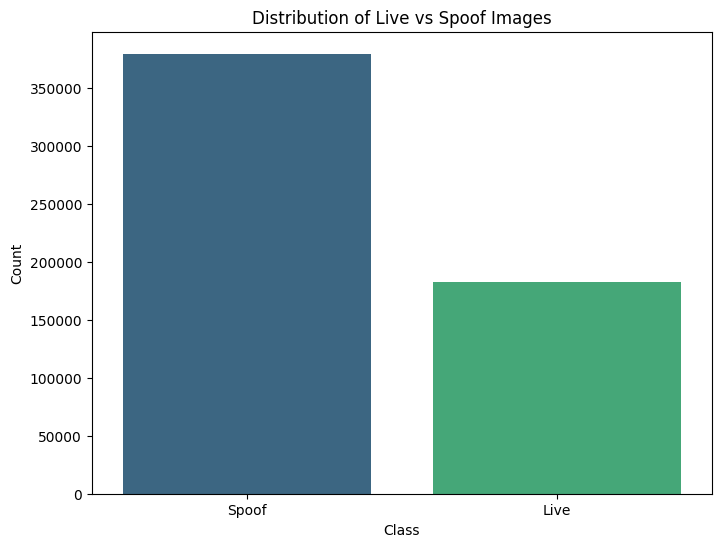

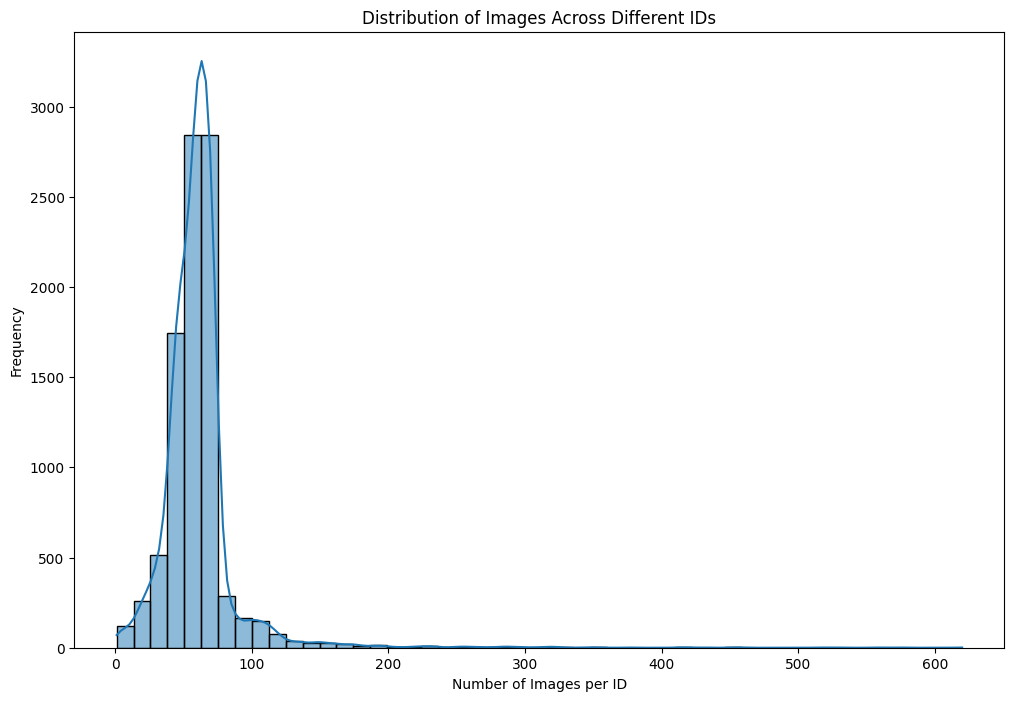

In [4]:
# Label Distribution Analysis

# Load metadata with tqdm progress bar
with tqdm(total=2, desc="Loading metadata") as pbar:
    with open(dataset_path / "metas" / "intra_test" / "train_label.json") as f:
        train_labels = json.load(f)
    pbar.update(1)
    with open(dataset_path / "metas" / "intra_test" / "test_label.json") as f:
        test_labels = json.load(f)
    pbar.update(1)

# Convert metadata to DataFrame
train_df = pd.DataFrame.from_dict(
    train_labels, orient="index", columns=[f"attr_{i}" for i in range(44)]
)
test_df = pd.DataFrame.from_dict(
    test_labels, orient="index", columns=[f"attr_{i}" for i in range(44)]
)

# Add 'split' column
train_df["split"] = "train"
test_df["split"] = "test"

# Combine train and test DataFrames
df = pd.concat([train_df, test_df])

# Analyze distribution of live vs spoof images
live_spoof_counts = df["attr_43"].value_counts().rename(index={0: "Live", 1: "Spoof"})

# Visualize class balance
plt.figure(figsize=(8, 6))
sns.barplot(x=live_spoof_counts.index, y=live_spoof_counts.values, palette="viridis")
plt.title("Distribution of Live vs Spoof Images")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Examine distribution across different IDs
df["ID"] = df.index.str.split("/").str[2]
id_counts = df["ID"].value_counts()

# Visualize distribution across IDs
plt.figure(figsize=(12, 8))
sns.histplot(id_counts, bins=50, kde=True)
plt.title("Distribution of Images Across Different IDs")
plt.xlabel("Number of Images per ID")
plt.ylabel("Frequency")
plt.show()

Loading bounding boxes: 100%|██████████| 67170/67170 [00:53<00:00, 1266.57it/s]


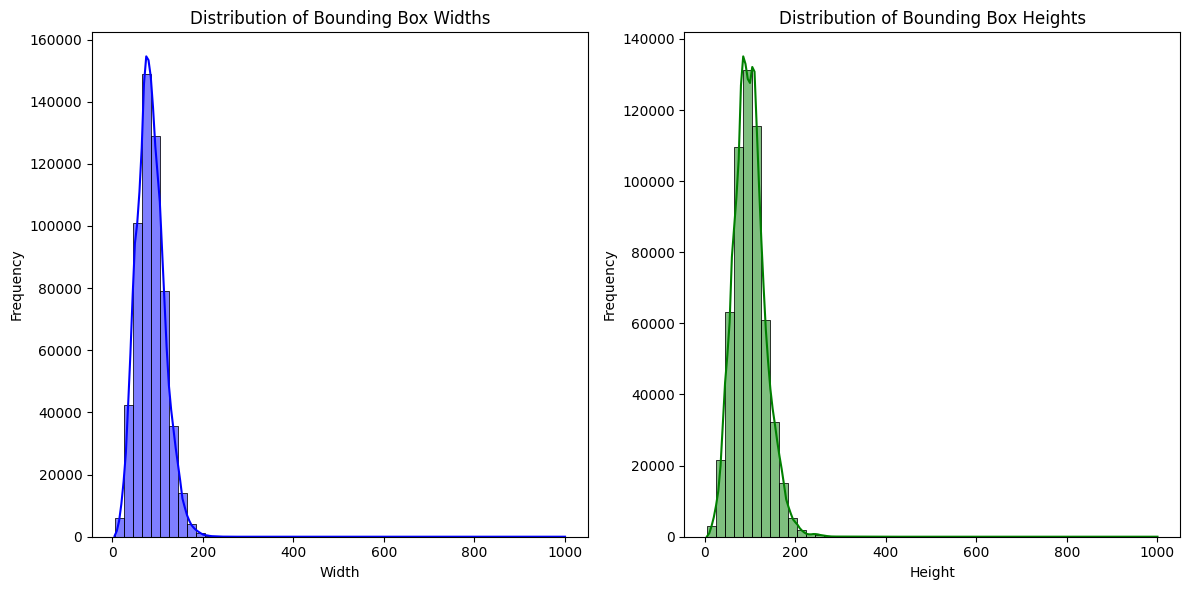

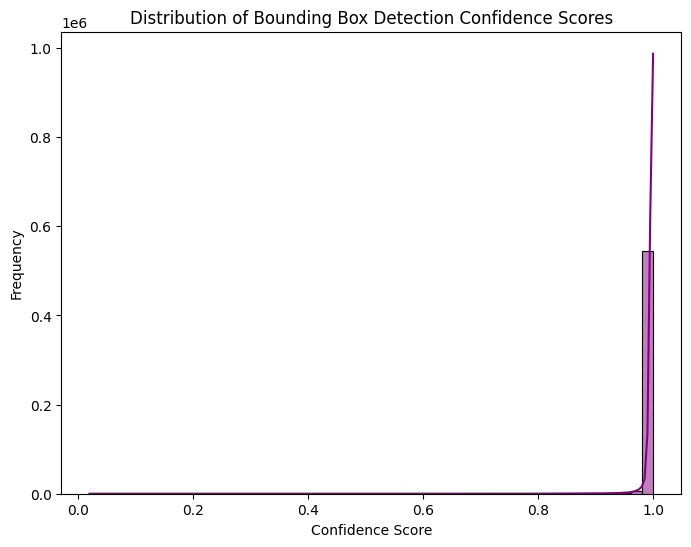

In [6]:
# Bounding Box Analysis

import concurrent.futures


# Function to load bounding box data from a single file
def load_bounding_box(file_path):
    with open(file_path, "r") as f:
        bbox = f.readline().strip().split()
        bbox = [float(x) for x in bbox]
    return bbox


# Function to load bounding box data from _BB.txt files with tqdm progress bar
def load_bounding_boxes(root_dir):
    bbox_data = []
    file_paths = []
    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith("_BB.txt"):
                file_paths.append(os.path.join(root, file))

    with tqdm(total=len(file_paths), desc="Loading bounding boxes") as pbar:
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = [
                executor.submit(load_bounding_box, file_path)
                for file_path in file_paths
            ]
            for future in concurrent.futures.as_completed(futures):
                bbox_data.append(future.result())
                pbar.update(1)

    return bbox_data


# Load bounding box data from train and test directories
train_bboxes = load_bounding_boxes(dataset_path / "Data" / "train")
test_bboxes = load_bounding_boxes(dataset_path / "Data" / "test")

# Convert bounding box data to DataFrame
bbox_columns = ["x", "y", "w", "h", "score"]
train_bbox_df = pd.DataFrame(train_bboxes, columns=bbox_columns)
test_bbox_df = pd.DataFrame(test_bboxes, columns=bbox_columns)

# Combine train and test bounding box DataFrames
bbox_df = pd.concat([train_bbox_df, test_bbox_df])
bbox_df["split"] = ["train"] * len(train_bbox_df) + ["test"] * len(test_bbox_df)

# Visualize bounding box width and height distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bbox_df["w"], bins=50, kde=True, color="blue")
plt.title("Distribution of Bounding Box Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(bbox_df["h"], bins=50, kde=True, color="green")
plt.title("Distribution of Bounding Box Heights")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Visualize bounding box detection confidence scores
plt.figure(figsize=(8, 6))
sns.histplot(bbox_df["score"], bins=50, kde=True, color="purple")
plt.title("Distribution of Bounding Box Detection Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

Visualizing spoof type distribution:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\quang\AppData\Local\Temp\ipykernel_14720\3360676797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


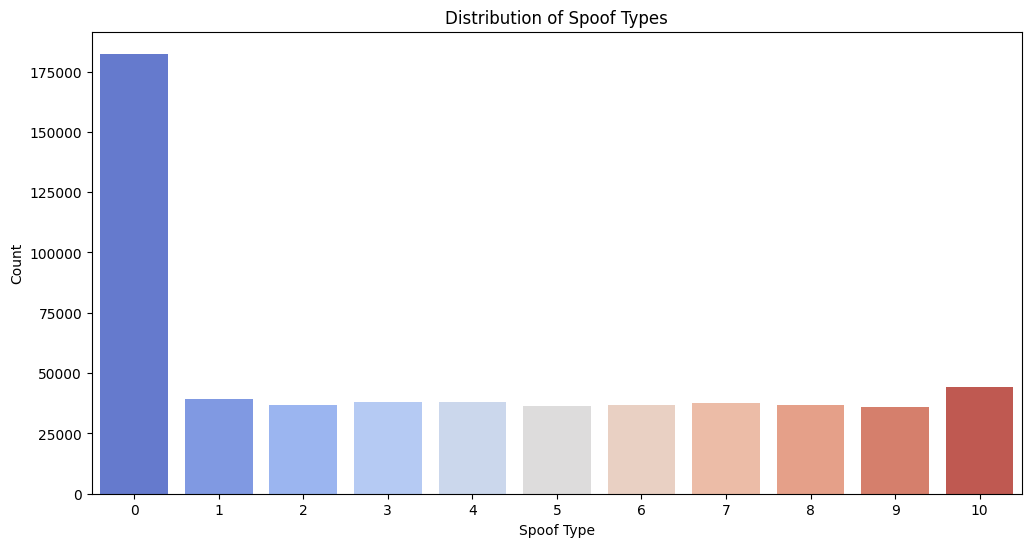

Visualizing spoof type distribution: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


In [7]:
# Spoof Type Distribution

# Analyze the distribution of different spoof types (label[40])
spoof_type_counts = df["attr_40"].value_counts()

# Visualize spoof type distribution with tqdm progress bar
with tqdm(total=1, desc="Visualizing spoof type distribution") as pbar:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=spoof_type_counts.index, y=spoof_type_counts.values, palette="coolwarm"
    )
    plt.title("Distribution of Spoof Types")
    plt.xlabel("Spoof Type")
    plt.ylabel("Count")
    plt.show()
    pbar.update(1)

Visualizing illumination distribution:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\quang\AppData\Local\Temp\ipykernel_14720\2552546734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


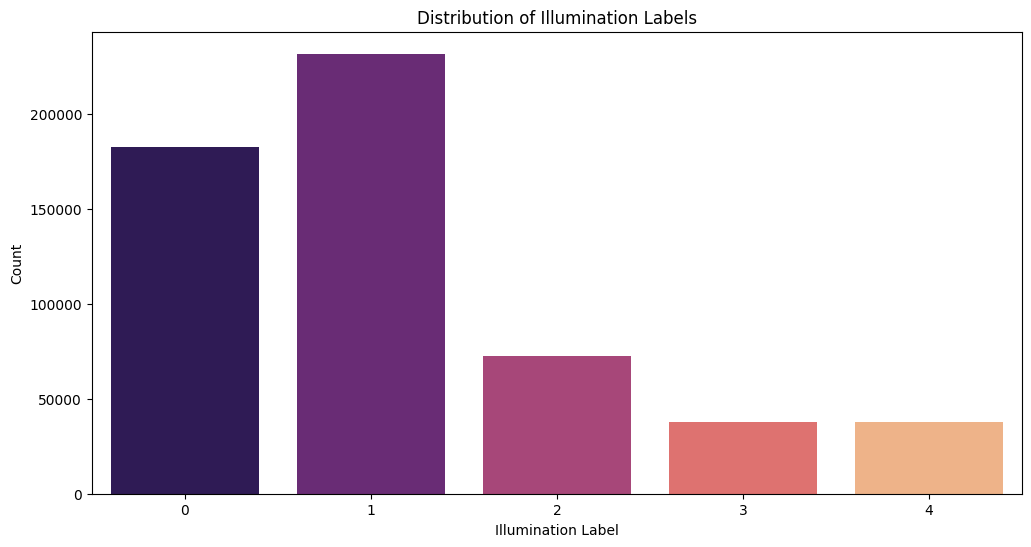

Visualizing environment distribution:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\quang\AppData\Local\Temp\ipykernel_14720\2552546734.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


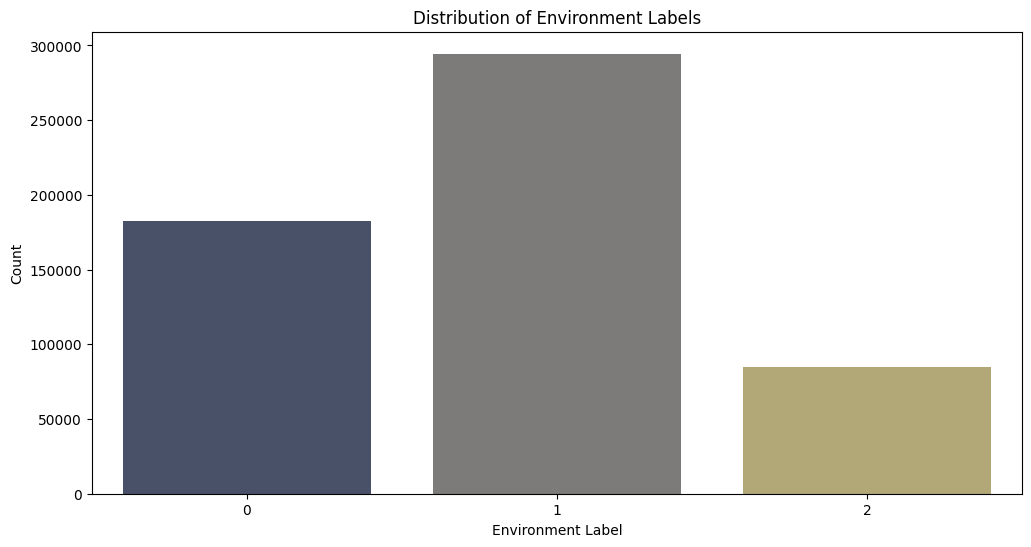

Visualizing environment distribution: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]
Examining relationship between illumination and environment: 100%|██████████| 1/1 [00:00<?, ?it/s]
Visualizing relationship between illumination and environment:   0%|          | 0/1 [00:00<?, ?it/s]

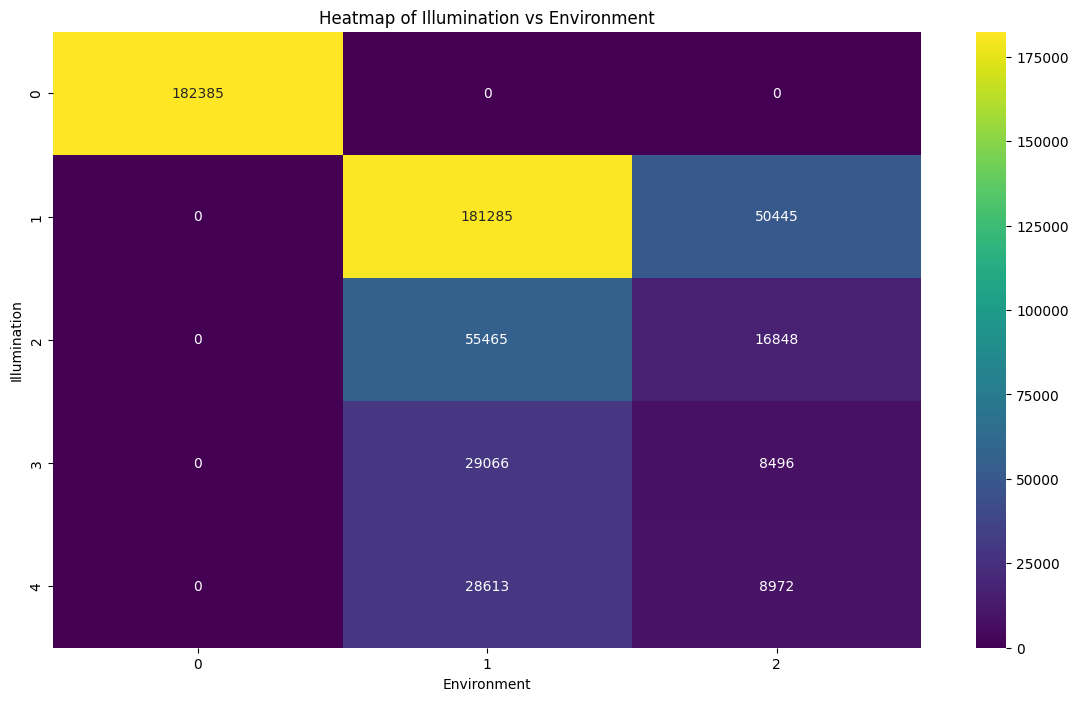

Visualizing relationship between illumination and environment: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]


In [8]:
# Environmental Factors Analysis

# Analyze illumination distribution (label[41]) with tqdm progress bar
with tqdm(total=1, desc="Analyzing illumination distribution") as pbar:
    illumination_counts = df["attr_41"].value_counts()
    pbar.update(1)

# Visualize illumination distribution with tqdm progress bar
with tqdm(total=1, desc="Visualizing illumination distribution") as pbar:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=illumination_counts.index, y=illumination_counts.values, palette="magma"
    )
    plt.title("Distribution of Illumination Labels")
    plt.xlabel("Illumination Label")
    plt.ylabel("Count")
    plt.show()
    pbar.update(1)

# Analyze environment distribution (label[42]) with tqdm progress bar
with tqdm(total=1, desc="Analyzing environment distribution") as pbar:
    environment_counts = df["attr_42"].value_counts()
    pbar.update(1)

# Visualize environment distribution with tqdm progress bar
with tqdm(total=1, desc="Visualizing environment distribution") as pbar:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=environment_counts.index, y=environment_counts.values, palette="cividis"
    )
    plt.title("Distribution of Environment Labels")
    plt.xlabel("Environment Label")
    plt.ylabel("Count")
    plt.show()
    pbar.update(1)

# Examine relationship between illumination and environment with tqdm progress bar
with tqdm(
    total=1, desc="Examining relationship between illumination and environment"
) as pbar:
    illum_env_df = df[["attr_41", "attr_42"]].copy()
    illum_env_df.columns = ["Illumination", "Environment"]
    pbar.update(1)

# Visualize relationship between illumination and environment with tqdm progress bar
with tqdm(
    total=1, desc="Visualizing relationship between illumination and environment"
) as pbar:
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        pd.crosstab(illum_env_df["Illumination"], illum_env_df["Environment"]),
        annot=True,
        fmt="d",
        cmap="viridis",
    )
    plt.title("Heatmap of Illumination vs Environment")
    plt.xlabel("Environment")
    plt.ylabel("Illumination")
    plt.show()
    pbar.update(1)

Loading sample images: 2it [00:00, 71.66it/s]
Loading sample images: 2it [00:00,  6.23it/s]


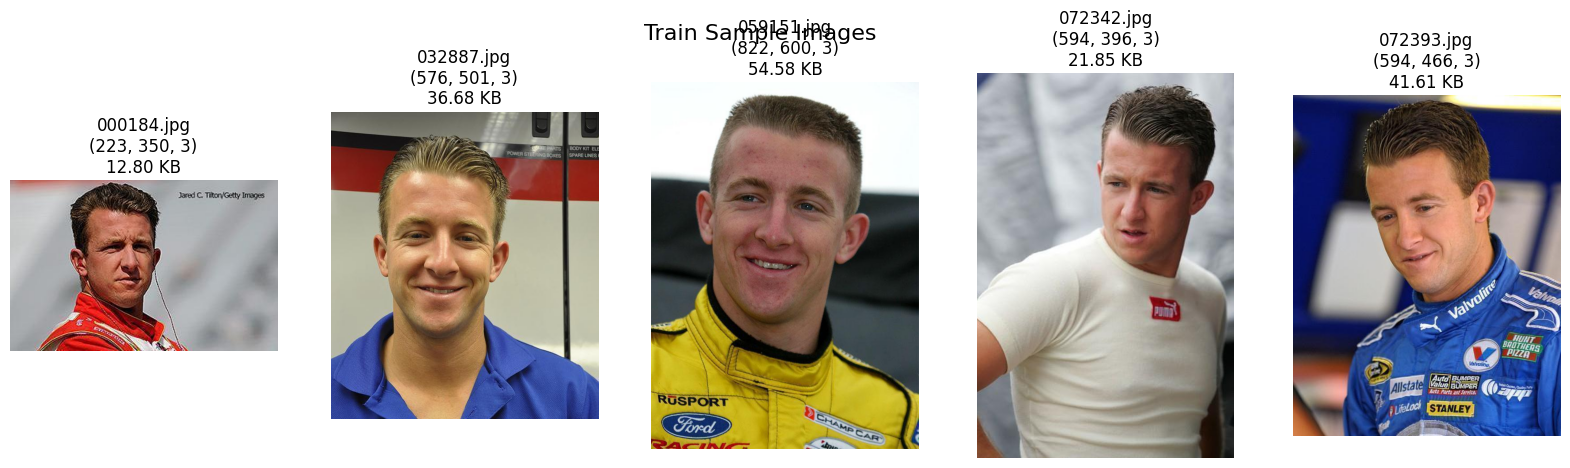

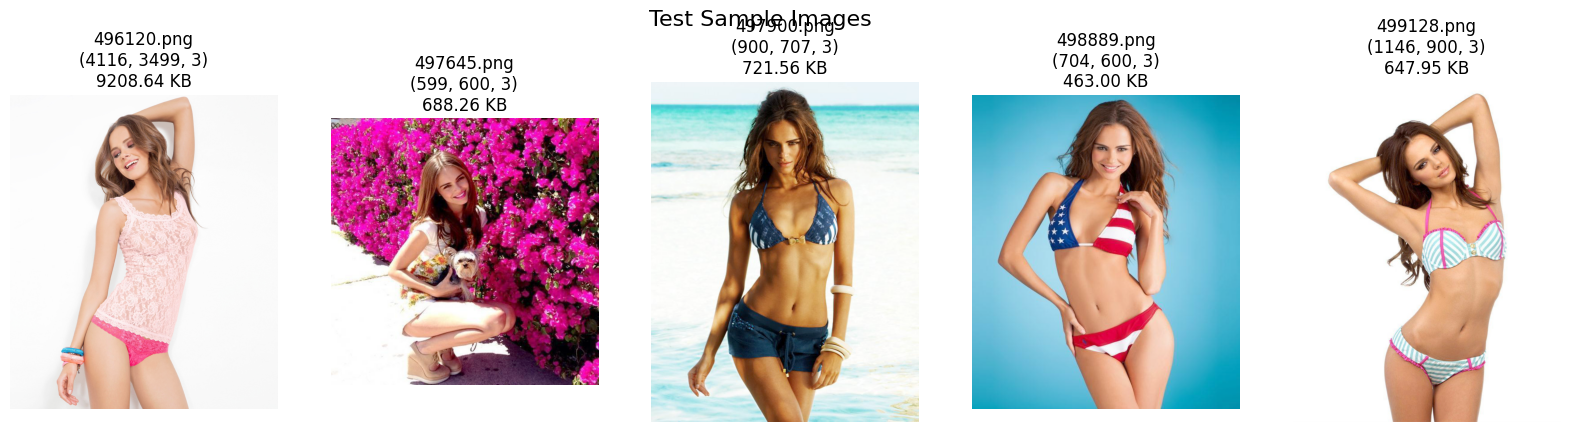

Analyzing image quality:   0%|          | 0/2 [00:00<?, ?it/s]

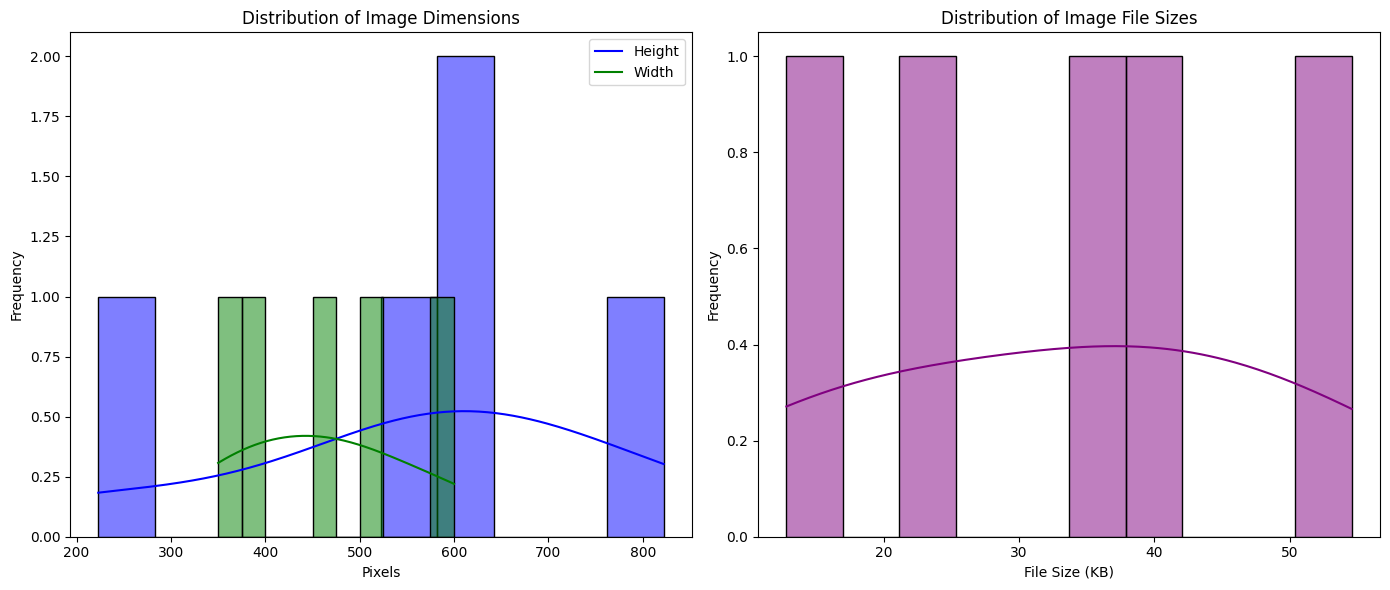

Analyzing image quality:   0%|          | 0/2 [00:00<?, ?it/s]

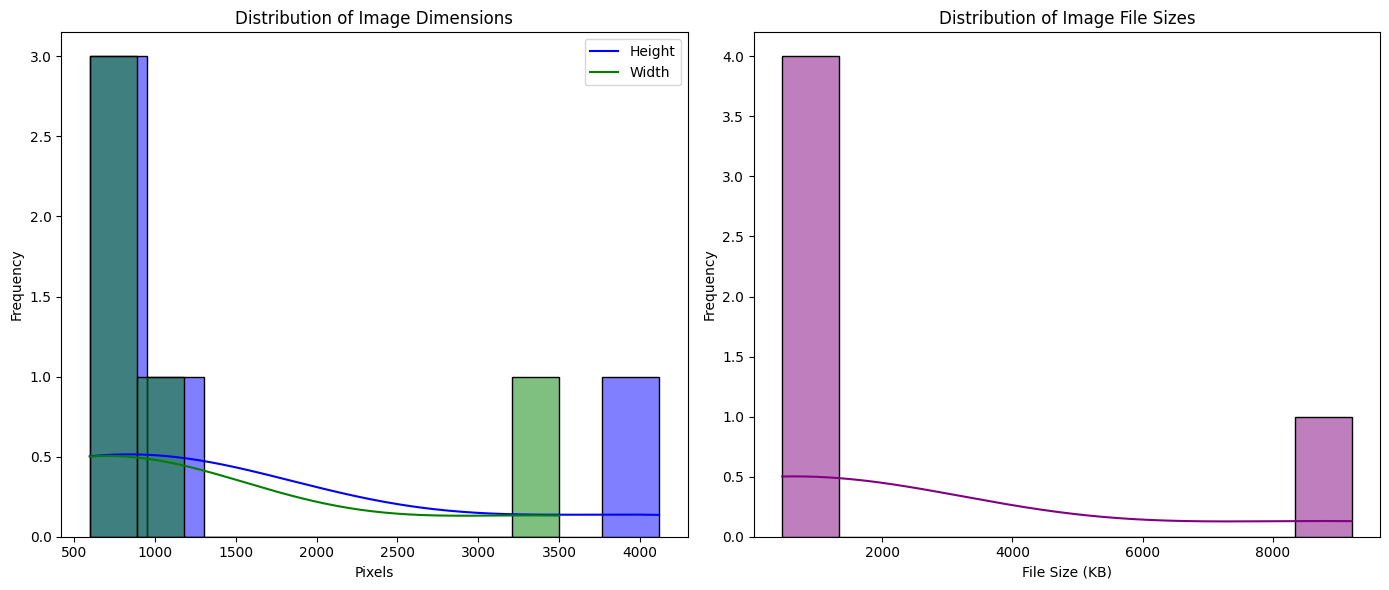

Analyzing image quality: 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]


In [9]:
# Image Quality Assessment


# Function to load sample images and examine their dimensions and file sizes with tqdm progress bar
def load_sample_images(root_dir, sample_size=5):
    sample_images = []
    for root, _, files in tqdm(os.walk(root_dir), desc="Loading sample images"):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                file_path = os.path.join(root, file)
                image = plt.imread(file_path)
                file_size = os.path.getsize(file_path)
                dimensions = image.shape
                sample_images.append((file_path, dimensions, file_size))
                if len(sample_images) >= sample_size:
                    return sample_images
    return sample_images


# Load sample images from train and test directories
train_sample_images = load_sample_images(dataset_path / "Data" / "train")
test_sample_images = load_sample_images(dataset_path / "Data" / "test")


# Display sample images and their properties
def display_sample_images(sample_images, title):
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 5))
    fig.suptitle(title, fontsize=16)
    for ax, (file_path, dimensions, file_size) in zip(axes, sample_images):
        image = plt.imread(file_path)
        ax.imshow(image)
        ax.set_title(
            f"{os.path.basename(file_path)}\n{dimensions}\n{file_size / 1024:.2f} KB"
        )
        ax.axis("off")
    plt.show()


# Display train sample images
display_sample_images(train_sample_images, "Train Sample Images")

# Display test sample images
display_sample_images(test_sample_images, "Test Sample Images")


# Analyze image dimensions and file sizes with tqdm progress bar
def analyze_image_quality(sample_images):
    dimensions = [dim for _, dim, _ in sample_images]
    file_sizes = [size for _, _, size in sample_images]

    # Convert dimensions to DataFrame
    dim_df = pd.DataFrame(dimensions, columns=["Height", "Width", "Channels"])

    # Plot distributions with tqdm progress bar
    with tqdm(total=2, desc="Analyzing image quality") as pbar:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(dim_df["Height"], bins=10, kde=True, color="blue")
        sns.histplot(dim_df["Width"], bins=10, kde=True, color="green")
        plt.title("Distribution of Image Dimensions")
        plt.xlabel("Pixels")
        plt.ylabel("Frequency")
        plt.legend(["Height", "Width"])
        pbar.update(1)

        plt.subplot(1, 2, 2)
        sns.histplot(
            [size / 1024 for size in file_sizes], bins=10, kde=True, color="purple"
        )
        plt.title("Distribution of Image File Sizes")
        plt.xlabel("File Size (KB)")
        plt.ylabel("Frequency")
        pbar.update(1)

        plt.tight_layout()
        plt.show()


# Analyze train sample image quality
analyze_image_quality(train_sample_images)

# Analyze test sample image quality
analyze_image_quality(test_sample_images)

Visualizing attribute distribution:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\quang\AppData\Local\Temp\ipykernel_14720\142689333.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


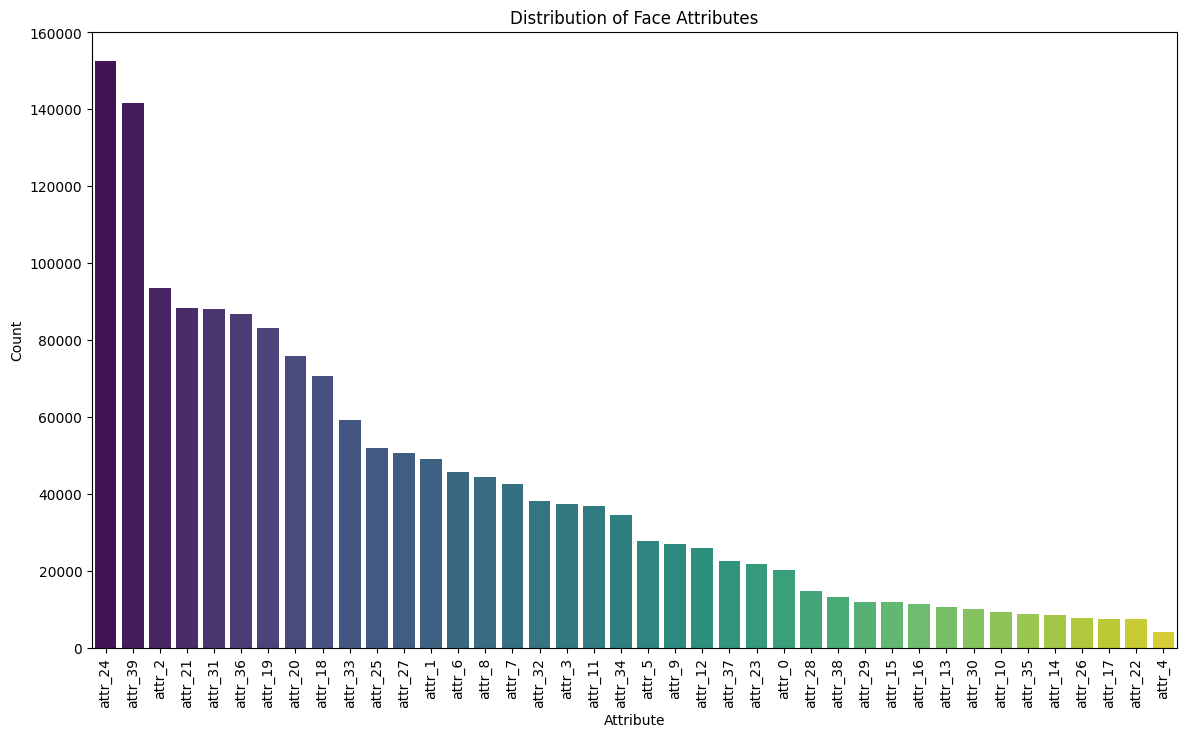

Visualizing correlation matrix:   0%|          | 0/1 [00:00<?, ?it/s]

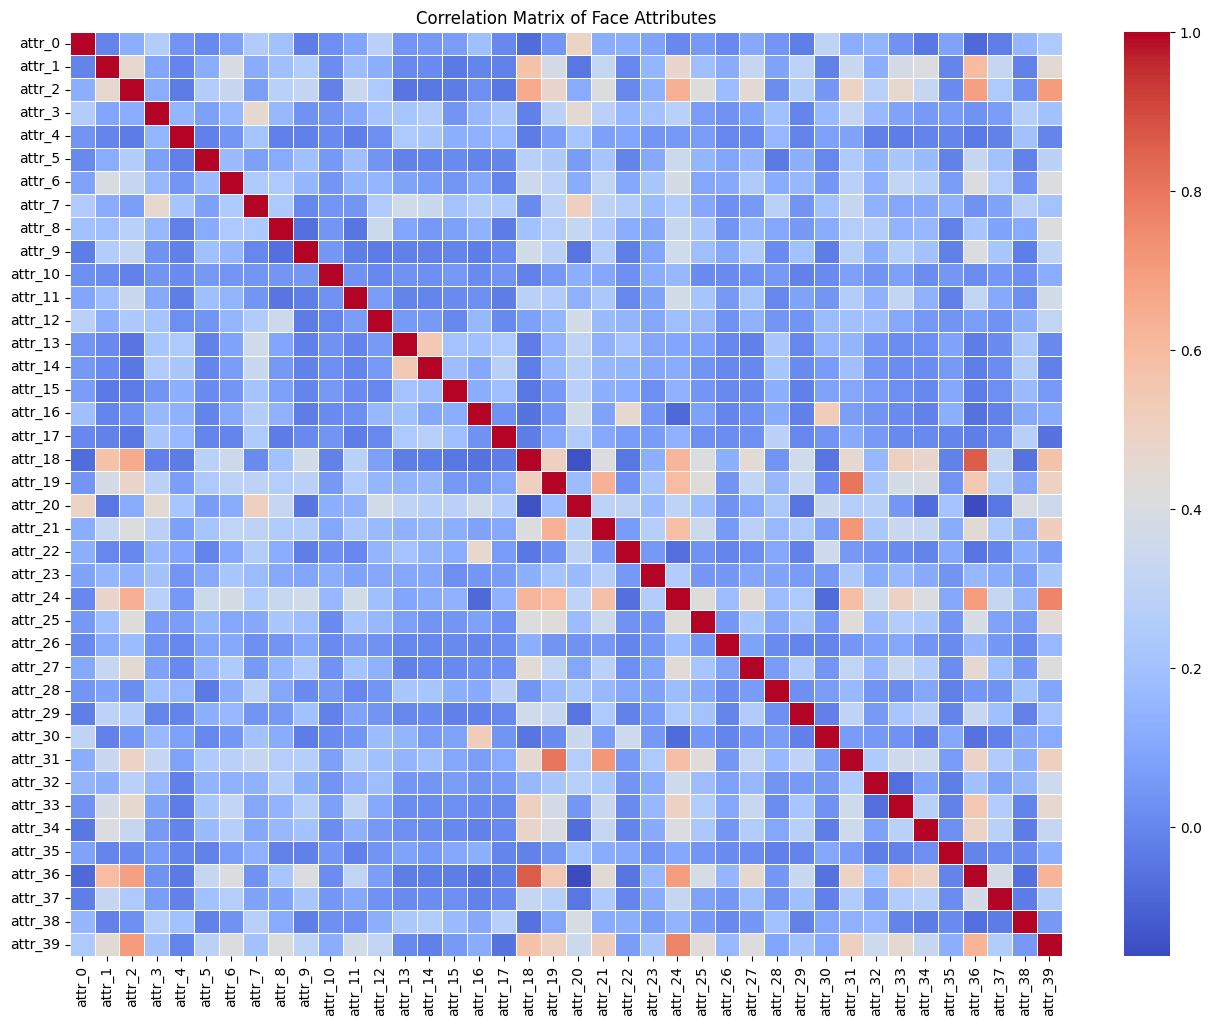

Identifying highly correlated attributes: 100%|██████████| 1/1 [00:00<?, ?it/s]


,Attribute 1,Attribute 2,Correlation
2,attr_1,attr_18,0.572754
3,attr_1,attr_36,0.599587
5,attr_2,attr_18,0.659010
6,attr_2,attr_24,0.639635
7,attr_2,attr_36,0.687788
8,attr_2,attr_39,0.701617
14,attr_7,attr_20,0.511047
21,attr_13,attr_14,0.545707
22,attr_14,attr_13,0.545707
26,attr_16,attr_30,0.528080


In [10]:
# Face Attributes Analysis

# Analyze the 40 face attribute labels (label[0:40])
face_attributes = df.iloc[:, :40]

# Calculate the distribution of each attribute with tqdm progress bar
with tqdm(total=1, desc="Calculating attribute distribution") as pbar:
    attribute_distribution = face_attributes.sum().sort_values(ascending=False)
    pbar.update(1)

# Visualize the distribution of face attributes with tqdm progress bar
with tqdm(total=1, desc="Visualizing attribute distribution") as pbar:
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x=attribute_distribution.index,
        y=attribute_distribution.values,
        palette="viridis",
    )
    plt.title("Distribution of Face Attributes")
    plt.xlabel("Attribute")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()
    pbar.update(1)

# Calculate the correlation matrix for the face attributes with tqdm progress bar
with tqdm(total=1, desc="Calculating correlation matrix") as pbar:
    correlation_matrix = face_attributes.corr()
    pbar.update(1)

# Visualize the correlation matrix with tqdm progress bar
with tqdm(total=1, desc="Visualizing correlation matrix") as pbar:
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix of Face Attributes")
    plt.show()
    pbar.update(1)

# Identify highly correlated attributes (correlation > 0.5 or < -0.5) with tqdm progress bar
with tqdm(total=1, desc="Identifying highly correlated attributes") as pbar:
    high_corr_pairs = correlation_matrix[
        (correlation_matrix > 0.5) | (correlation_matrix < -0.5)
    ]
    high_corr_pairs = high_corr_pairs.stack().reset_index()
    high_corr_pairs = high_corr_pairs[
        high_corr_pairs["level_0"] != high_corr_pairs["level_1"]
    ]
    high_corr_pairs.columns = ["Attribute 1", "Attribute 2", "Correlation"]
    pbar.update(1)

# Display highly correlated attribute pairs
high_corr_pairs